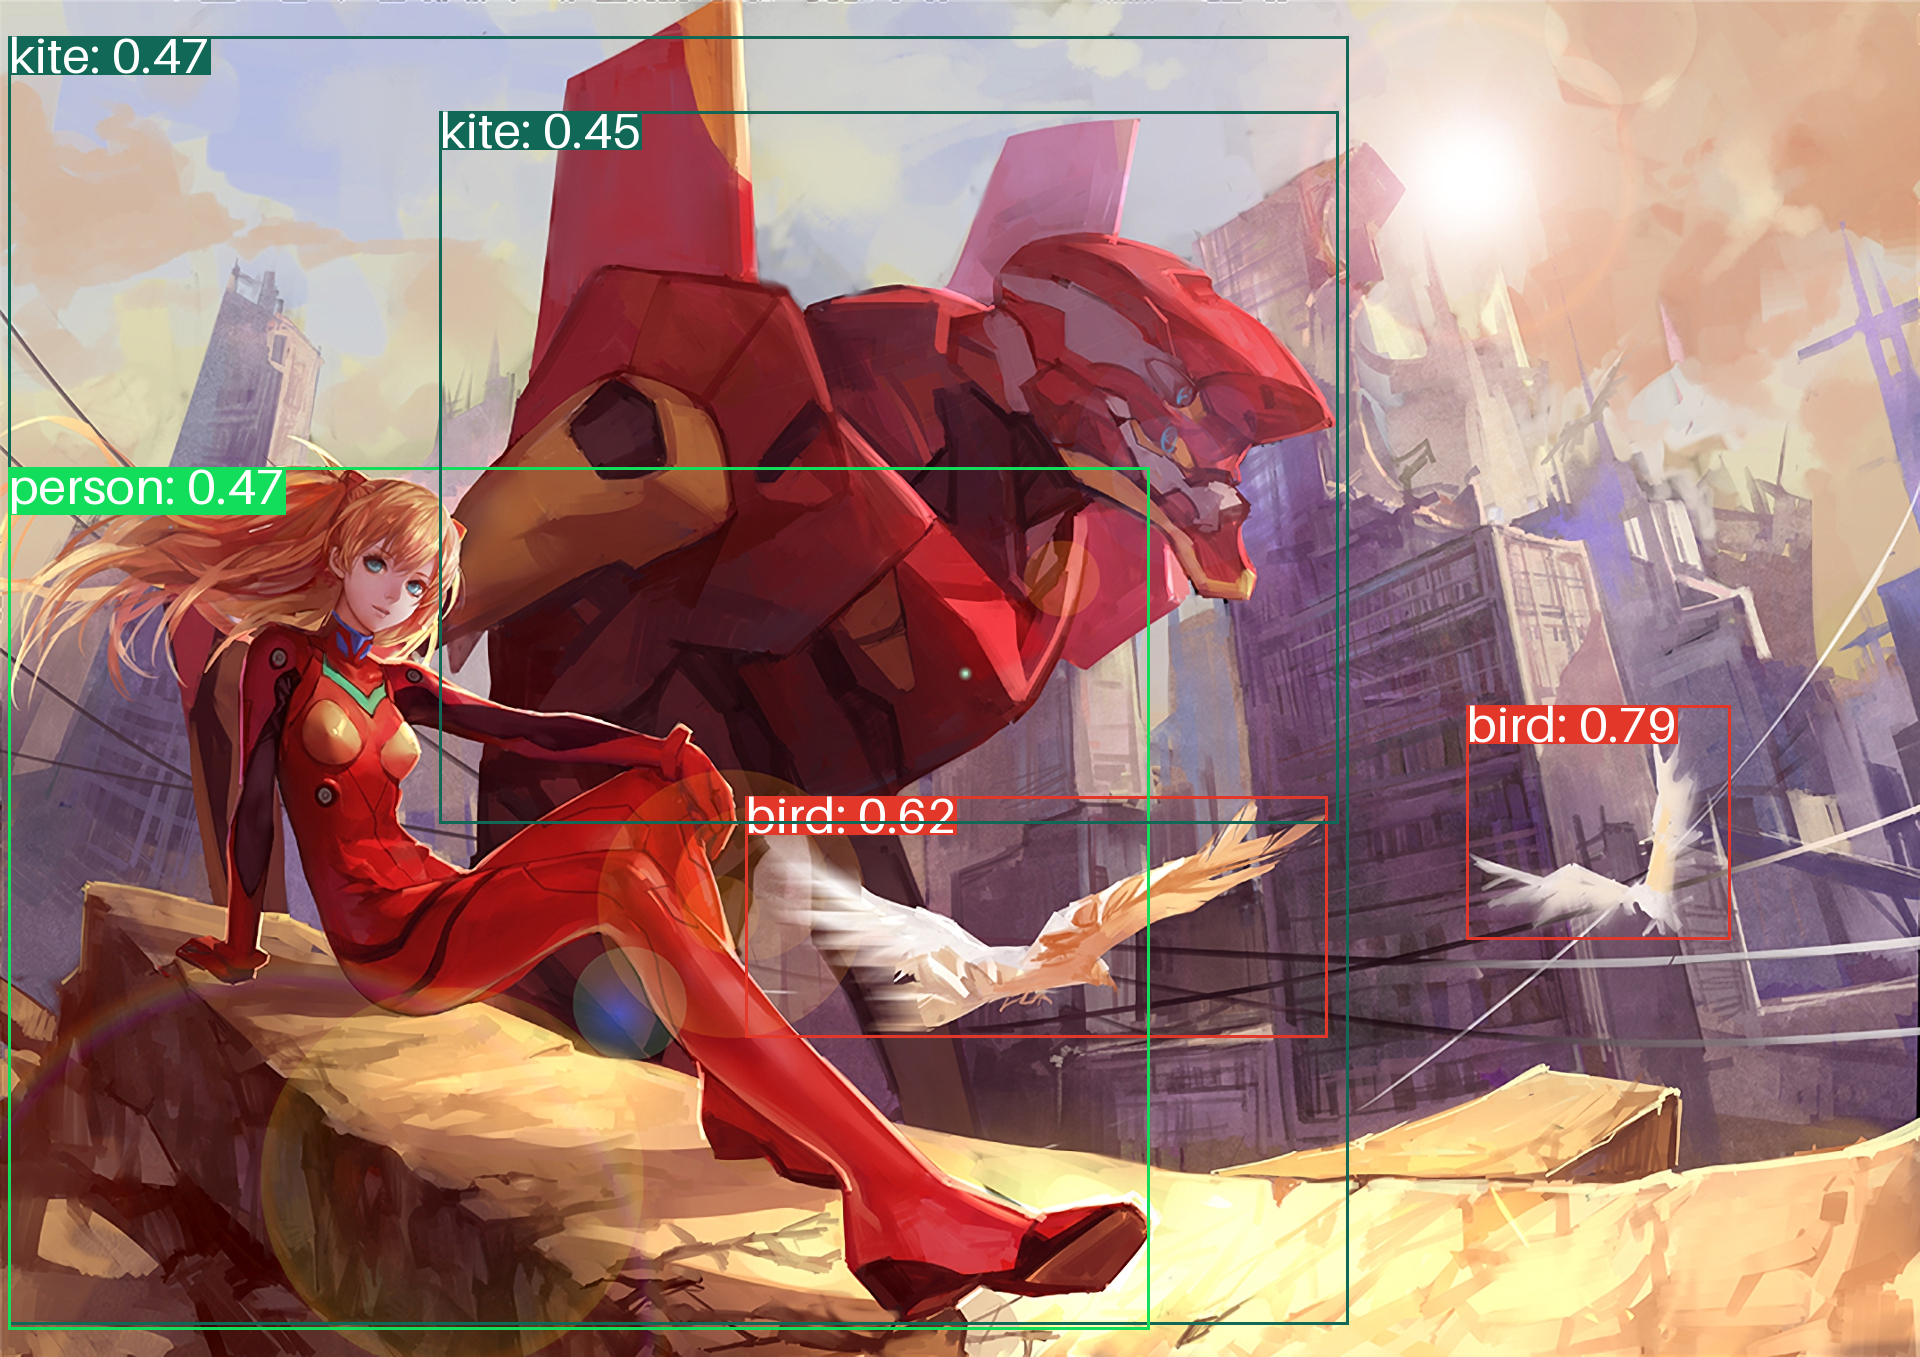

In [1]:
from transformers import AutoImageProcessor, AutoModelForObjectDetection

processor = AutoImageProcessor.from_pretrained("PekingU/rtdetr_r101vd", cache_dir="./hf-models")
model = AutoModelForObjectDetection.from_pretrained("PekingU/rtdetr_r101vd", cache_dir="./hf-models")
model.to("cuda")
import torch
from PIL import Image, ImageDraw, ImageFont
import requests
from utils import generate_random_color


image = Image.open('./images/eva.jpg')


inputs = processor(images=image, return_tensors="pt").to("cuda")


model.eval()
outputs = model(**inputs)

CLASS_COLOR = {}
target_sizes = torch.tensor([image.size[::-1]])

results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.3)

# font = ImageFont.truetype(r"C:\Users\hanma\AppData\Local\Microsoft\Windows\Fonts\MapleMono-NF-CN-Regular.ttf", 25)
# font = ImageFont.truetype(r"Maple Mono NF CN.ttf", 25)
# font = ImageFont.load_default(25)
# (left, top, right, bottom) = font.getbbox('getbbox')


def draw_result(image, box, label_text, score,color, font="", size=25):
    draw = ImageDraw.Draw(image)

    font = ImageFont.load_default(size) if not font else ImageFont.truetype(font, size)
    (left, top, right, bottom) = font.getbbox('getbbox')

    draw.rectangle(box, outline=color, width=3)
    text_bbox = draw.textbbox((box[0], box[1]), f"{label_text}: {score:.2f}", font=font)
    draw.rectangle((text_bbox[0], text_bbox[1]-top, text_bbox[2], text_bbox[3]-top), fill=color)
    draw.text((box[0], box[1]-top), f"{label_text}: {score:.2f}", fill='white', font=font)

for result in results:
    for score, label_id, box in zip(result["scores"], result["labels"], result["boxes"]):
        
        score, label = score.item(), label_id.item()
        box = [int(i) for i in box]
        if label not in CLASS_COLOR:
            CLASS_COLOR[label] = generate_random_color()


        # draw.rectangle(box, outline=CLASS_COLOR[label], width=3)
        label_text = model.config.id2label[label]

        draw_result(image, box, label_text, score, CLASS_COLOR[label], size=50)

        # text_bbox = draw.textbbox((box[0], box[1]), f"{label_text}: {score:.2f}", font=font)
        # text_bbox = list(text_bbox)
        # text_bbox[1] -= top
        # text_bbox[3] -= top

        # draw.rectangle(text_bbox, fill=CLASS_COLOR[label])
        # draw.text((box[0], box[1]-top), f"{label_text}: {score:.2f}", fill='white', font=font)

image

In [6]:
inputs.keys()

dict_keys(['pixel_values'])

In [3]:
import cv2
cap = cv2.VideoCapture("http://192.168.253.2:4747/video")
# cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
# cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)
while True:
    ret, frame = cap.read()
    if (not ret):
        print("Error reading frame")
        break
    cv2.imshow("Network Camera", frame)
    if cv2.waitKey(1) == ord('q'):
        break
cv2.destroyAllWindows()

Error reading frame


In [1]:
import cv2
from ultralytics import YOLO

# Load a pretrained YOLO11n model
model = YOLO("yolo11n.pt")
results = model("./images/eva.jpg")


image 1/1 c:\Users\hanma\Programming\nextjs-learn\ai-python\images\eva.jpg: 480x640 1 umbrella, 1 kite, 64.5ms
Speed: 6.6ms preprocess, 64.5ms inference, 157.1ms postprocess per image at shape (1, 3, 480, 640)


In [3]:
import cv2


cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Error: Could not open video device")
    exit()

width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)

print(f"摄像头分辨率: {int(width)}x{int(height)}")

# 释放摄像头
cap.release()

摄像头分辨率: 640x480


In [2]:
import cv2
def list_cameras(max_cameras=10):
    available_cameras = []
    for i in range(max_cameras):
        cap = cv2.VideoCapture(i)
        if cap.isOpened():
            available_cameras.append(i)
            cap.release()
    return available_cameras

# 列出所有可用的摄像头
cameras = list_cameras()
print(f"Available cameras: {cameras}")

Available cameras: [0]


# opencv font

In [7]:
import cv2

# 创建一个黑色图像
img = cv2.imread('./images/eva.jpg')

# 在图像上绘制文本
cv2.putText(img, 'Simplex', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 1)
cv2.putText(img, 'Plain', (10, 60), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 255), 1)
cv2.putText(img, 'Duplex', (10, 90), cv2.FONT_HERSHEY_DUPLEX, 1, (255, 255, 0), 1)
cv2.putText(img, 'Complex', (10, 120), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 0), 1)
cv2.putText(img, 'Triplex', (10, 150), cv2.FONT_HERSHEY_TRIPLEX, 1, (255, 255, 0), 1)
cv2.putText(img, 'Complex Small', (10, 180), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255, 255, 0), 1)
cv2.putText(img, 'Script Simplex', (10, 210), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 1, (255, 255, 0), 1)
cv2.putText(img, 'Script Complex', (10, 240), cv2.FONT_HERSHEY_SCRIPT_COMPLEX, 1, (255, 255, 0), 1)
cv2.putText(img, 'Italic', (10, 270), cv2.FONT_HERSHEY_SIMPLEX | cv2.FONT_ITALIC, 1, (255, 255, 0), 1)

# 显示图像
cv2.imshow('Image with Text', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
import matplotlib.font_manager

# 获取系统中所有字体的路径
font_paths = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

# 获取字体名称
font_names = [matplotlib.font_manager.FontProperties(fname=font_path).get_name() for font_path in font_paths]

# 打印所有字体名称
for font_name in font_names:
    print(font_name)

Cascadia Mono NF
Palace Script MT
Niagara Engraved
Segoe UI
Lucida Calligraphy
Leelawadee UI
Arial
Segoe Script
Arial
Cascadia Mono PL
Bookman Old Style
JetBrainsMono Nerd Font Mono
Calibri
Bodoni MT
Cascadia Mono NF
Calisto MT
Rockwell Extra Bold
Calibri
Microsoft JhengHei
Rage Italic
MS Reference Sans Serif
Bodoni MT
JetBrainsMono Nerd Font
French Script MT
Eras Demi ITC
Lucida Sans
JetBrainsMonoNL Nerd Font Propo
JetBrainsMono Nerd Font Mono
Fira Code
STHupo
Gadugi
Garamond
Lucida Sans
Monaspace Neon Var
Arial
Malgun Gothic
JetBrainsMono Nerd Font Propo
JetBrainsMono Nerd Font Mono
Inconsolata
Arial
Segoe UI
Arial
Impact
JetBrainsMono Nerd Font Mono
Garamond
Microsoft New Tai Lue
Consolas
Tw Cen MT
Script MT Bold
JetBrainsMonoNL Nerd Font Propo
JetBrainsMonoNL Nerd Font Propo
Consolas
Candara
JetBrainsMono Nerd Font Propo
Californian FB
Segoe UI
Rockwell Condensed
JetBrainsMonoNL Nerd Font Mono
Yu Gothic
Segoe Script
Segoe UI Symbol
JetBrainsMono Nerd Font Mono
Maple Mono NF CN
Cour

In [16]:
from PIL import ImageFont
ImageFont.load_default()
ImageFont.truetype(r"C:\Users\hanma\AppData\Local\Microsoft\Windows\Fonts\MapleMono-NF-CN-Regular.ttf", 24)

In [1]:
(1, "aaa") < (2, "bbb")

True